Deliverables



1. A report (in the form of a presentation, both verbal and through a slides)


2. A github repository containing your jupyter notebook that walks through the pipeline along with the .py files necessary to reproduce your model.



In [1]:
import wrangle
import pandas as pd
import numpy as np
import evaluate
import explore
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


In [2]:
#use wrangle.py to import data from mySQL
df =wrangle.get_data_from_sql()

In [3]:
# check DF head
df.head()

bathrooms  bedrooms  square_feet    fips  lot_size  pool  zip_code  \
0        2.0       3.0       1458.0  6037.0    8284.0   1.0   97318.0   
1        1.0       2.0       1421.0  6037.0    6707.0   NaN   96018.0   
2        3.0       4.0       2541.0  6059.0    4975.0   NaN   96958.0   
3        2.0       3.0       1650.0  6037.0    7300.0   NaN   96037.0   
4        1.0       2.0        693.0  6037.0    2908.0   NaN   96023.0   

   year_built    latitude    longitude  assessed_value  tax_value  \
0      1970.0  34686163.0 -118113100.0        136104.0    2319.90   
1      1911.0  33999877.0 -118291863.0         35606.0     543.69   
2      2003.0  33694636.0 -117912245.0        880456.0    9819.72   
3      1949.0  33985377.0 -118361620.0        614000.0    7673.19   
4      1921.0  34112946.0 -118208106.0        274237.0    3267.47   

  transaction_date  
0       2017-06-23  
1       2017-06-30  
2       2017-06-01  
3       2017-06-01  
4       2017-06-29

In [4]:
# check DF tail
df.tail()

bathrooms  bedrooms  square_feet    fips  lot_size  pool  zip_code  \
14985        3.0       5.0       2526.0  6059.0    7800.0   1.0   97018.0   
14986        3.0       5.0       2735.0  6059.0    7100.0   1.0   97067.0   
14987        2.0       3.0       1536.0  6037.0    8818.0   1.0   96523.0   
14988        3.0       5.0       2655.0  6059.0    6000.0   NaN   97065.0   
14989        3.0       4.0       2305.0  6037.0    5742.0   NaN   96129.0   

       year_built    latitude    longitude  assessed_value  tax_value  \
14985      1994.0  33753643.0 -117766503.0        458903.0    5718.72   
14986      1963.0  33783173.0 -117817799.0        115387.0    1465.88   
14987      1955.0  34058178.0 -117948180.0        297097.0    3519.78   
14988      1994.0  33836898.0 -117801369.0        746963.0    8065.50   
14989      1949.0  33952368.0 -118441155.0        579047.0    6996.21   

      transaction_date  
14985       2017-06-30  
14986       2017-06-30  
14987       2017-06-30  
14988       2017-06-30  
14989       2017-06-30

In [5]:
# there are null values in lot_size, pool, zip_code, year_built and tax-value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14990 entries, 0 to 14989
Data columns (total 13 columns):
bathrooms           14990 non-null float64
bedrooms            14990 non-null float64
square_feet         14990 non-null float64
fips                14990 non-null float64
lot_size            14893 non-null float64
pool                3287 non-null float64
zip_code            14982 non-null float64
year_built          14974 non-null float64
latitude            14990 non-null float64
longitude           14990 non-null float64
assessed_value      14990 non-null float64
tax_value           14989 non-null float64
transaction_date    14990 non-null object
dtypes: float64(12), object(1)
memory usage: 1.5+ MB


In [6]:
#wrangle data to remove NANs
df = wrangle.wrangle_zillow()

In [7]:
#create a new column tax-rate
df['tax_rate'] = df.tax_value/df.assessed_value

In [8]:
df.head()

bathrooms  bedrooms  square_feet  fips  lot_size  pool  zip_code  \
0        2.0       3.0       1458.0  6037      8284     1     97318   
1        1.0       2.0       1421.0  6037      6707     0     96018   
2        3.0       4.0       2541.0  6059      4975     0     96958   
3        2.0       3.0       1650.0  6037      7300     0     96037   
4        1.0       2.0        693.0  6037      2908     0     96023   

   year_built    latitude    longitude  assessed_value  tax_value  \
0        1970  34686163.0 -118113100.0        136104.0    2319.90   
1        1911  33999877.0 -118291863.0         35606.0     543.69   
2        2003  33694636.0 -117912245.0        880456.0    9819.72   
3        1949  33985377.0 -118361620.0        614000.0    7673.19   
4        1921  34112946.0 -118208106.0        274237.0    3267.47   

  transaction_date  tax_rate  
0       2017-06-23  0.017045  
1       2017-06-30  0.015270  
2       2017-06-01  0.011153  
3       2017-06-01  0.012497  
4       2017-06-29  0.011915

In [9]:
#https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697
#source for county fips code. Read codes in a data DataFrame named fips_codes
#fips_codes = pd.read_clipboard()

In [14]:
fips_code = pd.DataFrame({
    'fips': [6037, 6059, 6111],
    'County':['Los Angles', 'Orange', 'Ventura']
    
})
fips_code.head()

fips      County
0  6037  Los Angles
1  6059      Orange
2  6111     Ventura

In [12]:
#merge df and fips_codes 
df = pd.merge(df, fips_code, left_on='fips', right_on='fips', how='left')

In [15]:
df.head()

bathrooms  bedrooms  square_feet  fips  lot_size  pool  zip_code  \
0        2.0       3.0       1458.0  6037      8284     1     97318   
1        1.0       2.0       1421.0  6037      6707     0     96018   
2        3.0       4.0       2541.0  6059      4975     0     96958   
3        2.0       3.0       1650.0  6037      7300     0     96037   
4        1.0       2.0        693.0  6037      2908     0     96023   

   year_built    latitude    longitude  assessed_value  tax_value  \
0        1970  34686163.0 -118113100.0        136104.0    2319.90   
1        1911  33999877.0 -118291863.0         35606.0     543.69   
2        2003  33694636.0 -117912245.0        880456.0    9819.72   
3        1949  33985377.0 -118361620.0        614000.0    7673.19   
4        1921  34112946.0 -118208106.0        274237.0    3267.47   

  transaction_date  tax_rate      County  
0       2017-06-23  0.017045  Los Angles  
1       2017-06-30  0.015270  Los Angles  
2       2017-06-01  0.011153      Orange  
3       2017-06-01  0.012497  Los Angles  
4       2017-06-29  0.011915  Los Angles

In [16]:
#split the data into train and test
train, test = train_test_split(df, train_size = .70, random_state = 123)

In [18]:
#create a subset of df with continuous variables to create pairplot
train_plot = df[['bathrooms', 'bedrooms', 'square_feet', 'lot_size', 'assessed_value']]

In [19]:
train_plot.head()

bathrooms  bedrooms  square_feet  lot_size  assessed_value
0        2.0       3.0       1458.0      8284        136104.0
1        1.0       2.0       1421.0      6707         35606.0
2        3.0       4.0       2541.0      4975        880456.0
3        2.0       3.0       1650.0      7300        614000.0
4        1.0       2.0        693.0      2908        274237.0

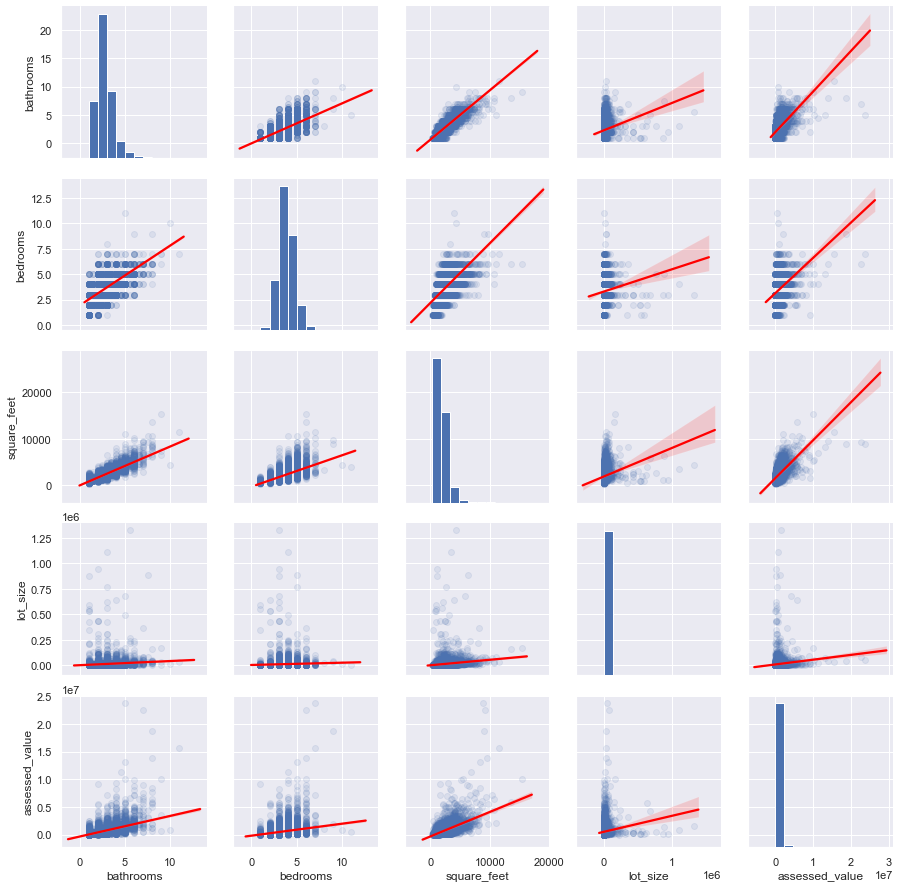

In [20]:
explore.plot_variable_pairs(train_plot)

Assessed_value of seems to be correlated to number of bathrooms, bedrooms, square_feet and lot size

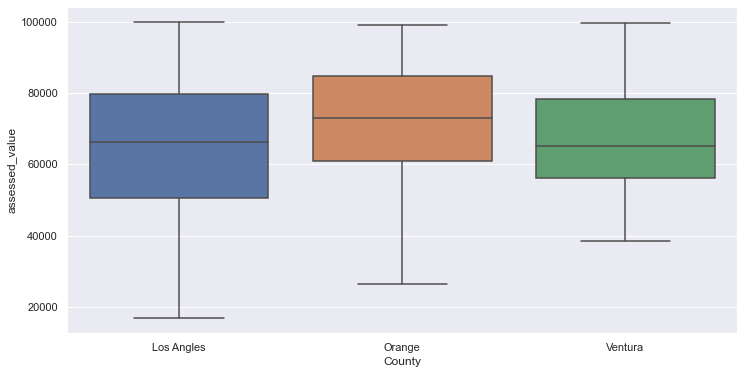

In [22]:
# Lets look at box plot of home values in each county. For better visualization, homes above 1 million are not plotted
plt.figure(figsize=(12,6))
sns.boxplot(x= train[train.assessed_value<100000].County, y= train[train.assessed_value<100000].assessed_value, data=train[train.assessed_value<100000])

In [23]:
train.head()

bathrooms  bedrooms  square_feet  fips  lot_size  pool  zip_code  \
1969         2.0       3.0       1793.0  6037     10032     1     96469   
11174        1.0       1.0        768.0  6059      1320     1     96181   
7468         2.0       3.0       1480.0  6037      7013     0     96161   
6287         1.0       3.0       1073.0  6037      6328     0     96173   
11360        1.0       3.0       1188.0  6037      5302     0     96212   

       year_built    latitude    longitude  assessed_value  tax_value  \
1969         1956  34112268.0 -117736579.0        471862.0    5805.08   
11174        1964  33890131.0 -117990185.0        233507.0    2828.78   
7468         1955  33857952.0 -118360292.0         98324.0    1310.38   
6287         1951  33954504.0 -118032119.0        286277.0    3781.14   
11360        1946  33863931.0 -118142447.0         70158.0    1133.55   

      transaction_date  tax_rate      County  
1969        2017-05-09  0.012302  Los Angles  
11174       2017-06-19  0.012114      Orange  
7468        2017-06-01  0.013327  Los Angles  
6287        2017-05-26  0.013208  Los Angles  
11360       2017-06-20  0.016157  Los Angles

In [26]:
# median value of homes is a better measure of central tendency for home values due to outliers.
train[train.assessed_value <1000000].assessed_value.median()

341639.5

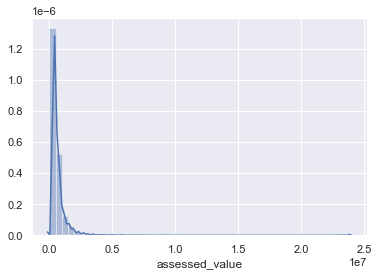

In [27]:
# plot showing distribution of home values. This looks like right skewed distribution
sns.distplot(train.assessed_value)

In [32]:
cm = train_plot.corr()
cm

bathrooms  bedrooms  square_feet  lot_size  assessed_value
bathrooms        1.000000  0.643196     0.855253  0.140262        0.516795
bedrooms         0.643196  1.000000     0.630065  0.069576        0.273758
square_feet      0.855253  0.630065     1.000000  0.182419        0.602603
lot_size         0.140262  0.069576     0.182419  1.000000        0.116572
assessed_value   0.516795  0.273758     0.602603  0.116572        1.000000

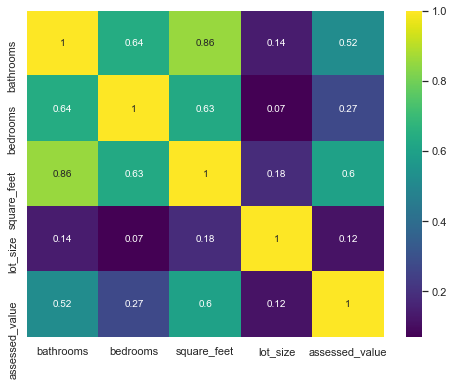

In [35]:
# lets look at heatmap and corresponding correlation values 
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='viridis')

In [ ]:
train['yhat_baseline'] = train['assessed_value'].median()

In [ ]:
train.head()

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse_bl = sqrt(mean_squared_error(train.assessed_value, train.yhat_baseline))

rmse_bl

In [ ]:
X_train = train[['bedrooms', 'bathrooms', 'square_feet']]
y_train = train[['assessed_value']]

In [ ]:
from statsmodels.formula.api import ols

# generate parameters, i.e. create model
ols_model = ols('assessed_value ~ bedrooms + bathrooms + square_feet', data = train).fit()

# compute predictions and add to original dataframe
train['yhat'] = ols_model.predict(X)

In [ ]:
ols_model.summary()

In [ ]:
rmse = sqrt(mean_squared_error(train.assessed_value, train.yhat))
rmse

# My RMSE for OLS model with bedrooom, bathroom and square feet (578329) is lower than my baseline (based on median)748179.  R2 is 0.37 and p-value is 0.

I am going to do a simple linear regression model based on bathrooms, bedrooms and square feet

In [ ]:
predictions = pd.DataFrame({
    'actual': y_train.final_grade
})
predictions.head()

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X, y)

In [ ]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("coefficients: ", lm.coef_)

In [ ]:
y['yhat_lm'] = lm.predict(X)

In [ ]:
y['baseline'] = y.assessed_value.median()

In [ ]:
y

In [ ]:
RMSE_lm = np.sqrt(mean_squared_error(y_train.final_grade, y_train.yhat_lm))
RMSE_lm

print("linear model\n  Root mean squared error: {:.3}".format(RMSE_lm)